## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(left=mouse_metadata, right=study_results, how="left", on="Mouse ID")
combined_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
number_of_mice = len(combined_study_df["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# combined_study_df[["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", ""]]

(combined_study_df.loc[combined_study_df["Timepoint"] == 0]
                  .sort_values(["Age_months",
                                "Sex",
                                "Weight (g)",
                                "Drug Regimen",
                                "Tumor Volume (mm3)"])
                  .set_index("Mouse ID")
)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s710,Capomulin,Female,1,23,0,45.0,0
i557,Capomulin,Female,1,24,0,45.0,0
h428,Ketapril,Female,1,27,0,45.0,0
c402,Stelasyn,Female,1,27,0,45.0,0
q132,Infubinol,Female,1,30,0,45.0,0
...,...,...,...,...,...,...,...
l490,Ceftamin,Male,24,26,0,45.0,0
o813,Infubinol,Male,24,28,0,45.0,0
j365,Zoniferol,Male,24,28,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

study_mean = (combined_study_df[["Drug Regimen","Tumor Volume (mm3)"]].set_index("Drug Regimen")
                                                                      .groupby("Drug Regimen")
                                                                      .mean()
             )
study_median = (combined_study_df[["Drug Regimen","Tumor Volume (mm3)"]].set_index("Drug Regimen")
                                                                      .groupby("Drug Regimen")
                                                                      .median()
             )
study_var = (combined_study_df[["Drug Regimen","Tumor Volume (mm3)"]].set_index("Drug Regimen")
                                                                      .groupby("Drug Regimen")
                                                                      .var()
            )
study_stdev = (combined_study_df[["Drug Regimen","Tumor Volume (mm3)"]].set_index("Drug Regimen")
                                                                      .groupby("Drug Regimen")
                                                                      .std()
              )
study_sem = (combined_study_df[["Drug Regimen","Tumor Volume (mm3)"]].set_index("Drug Regimen")
                                                                      .groupby("Drug Regimen")
                                                                      .sem()
              )

summary_df = pd.DataFrame(study_mean).rename(columns={"Tumor Volume (mm3)": "Mean"})
# summary_df["Mean"] = study_mean
summary_df["Median"] = study_median
summary_df["Variance"] = study_var
summary_df["Standard Deviation"] = study_stdev
summary_df["SEM"] = study_sem
# summary_df = pd.DataFrame({"Mean":study_mean, "Median":study_median, "Var":study_var, "StDev":study_stdev, "SEM":study_sem},
#                           index=study_mean["Drug Regimen"],
#                           columns=["Mean", "Median", "Variance", "Standard Dev", "SEM"]
#                            )
# summary_df = pd.DataFrame([study_mean, study_median, study_var, study_stdev, study_sem])
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.


## Bar Plots

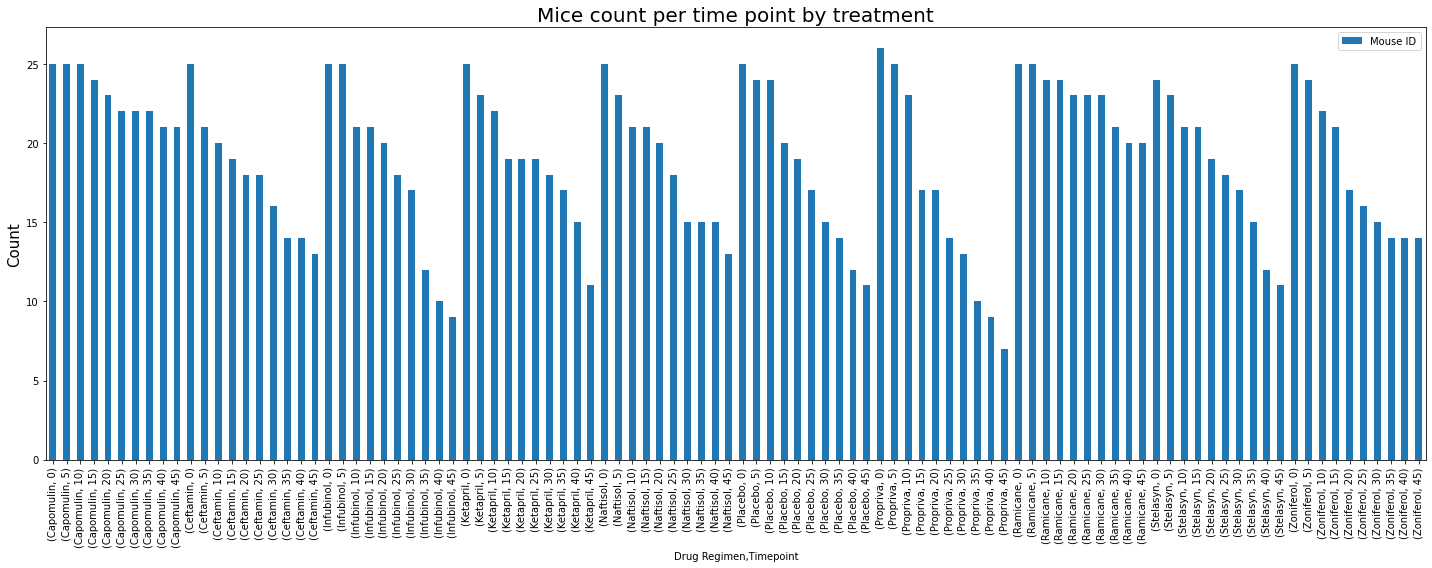

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_mice_treat = combined_study_df[["Drug Regimen", "Timepoint", "Mouse ID"]].groupby(by=["Drug Regimen", "Timepoint"]).count()
bar_mice_treat.plot(kind="bar", figsize=(20, 8))
plt.title("Mice count per time point by treatment", fontsize=20)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
plt.show()

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_timepoint=max(combined_study_df["Timepoint"])
promising_regimens=["Capomulin","Ramicane", "Zoniferol"]

# Initialize dictionary that will save each regimen dataframe
final_vols_dict = {}

for regimen in promising_regimens:
    # Filter combined study for mice in final time point with specified regimen
    final_mouse_filter=(combined_study_df["Timepoint"] == max_timepoint) & (combined_study_df["Drug Regimen"] == regimen)
    final_tumor_vol_df = combined_study_df.loc[final_mouse_filter]
    
    #Once filtered, save dataframe into dictionary with regimen key
    final_vols_dict[regimen] = final_tumor_vol_df["Tumor Volume (mm3)"]
    
    #Calculate quartiles, IRQ
    quartiles = final_tumor_vol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    medianq = quartiles[0.5]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Display quartile information
    print(f"Drug Regimen: {regimen}")
    print(f"The lower quartile      : {lowerq:.2f}")
    print(f"The upper quartile      : {upperq:.2f}")
    print(f"The interquartile range : {iqr:5.2f}")
    print(f"The median              : {medianq:.2f}")
    print(f"\nValues below {lower_bound:.2f} or above {upper_bound:.2f} could be outliers.")
    
    # Make a dataframe of the outliers, determine its size to get number of outliers
    outlier_filter = (final_tumor_vol_df["Tumor Volume (mm3)"] < lower_bound) | (final_tumor_vol_df["Tumor Volume (mm3)"] > upper_bound)
    outlier_tumor_vol = final_tumor_vol_df.loc[outlier_filter]
    print(f"Number of outliers      : {len(outlier_tumor_vol)}")
    print("====================================================")

Drug Regimen: Capomulin
The lower quartile      : 32.38
The upper quartile      : 40.16
The interquartile range :  7.78
The median              : 37.31

Values below 20.70 or above 51.83 could be outliers.
Number of outliers      : 0
Drug Regimen: Ramicane
The lower quartile      : 30.98
The upper quartile      : 38.51
The interquartile range :  7.53
The median              : 34.85

Values below 19.69 or above 49.80 could be outliers.
Number of outliers      : 0
Drug Regimen: Zoniferol
The lower quartile      : 62.62
The upper quartile      : 68.34
The interquartile range :  5.72
The median              : 65.68

Values below 54.03 or above 76.93 could be outliers.
Number of outliers      : 0


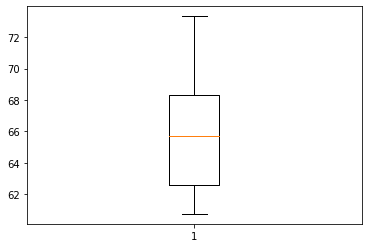

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(x=final_vols_dict["Zoniferol"])
plt.ylim=(0,100)
plt.show()

## Line and Scatter Plots

In [15]:
from pprint import pprint

============================ Mouse IDs treated with Capomulin ============================
['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957', 't565', 'i738',
 'w914', 'g288', 'l897', 'b742', 'b128', 'j246', 'j119', 'w150', 'v923', 'g316',
 's710', 'l509', 'r944', 'i557', 'r157']



Select ID to plot:  u364


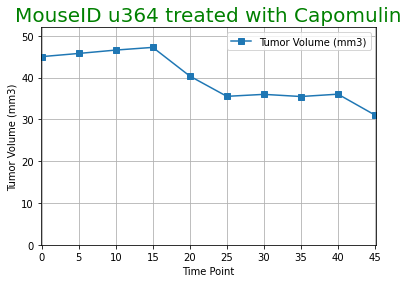

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
treatment = "Capomulin"
mice_to_choose_filter = (combined_study_df["Drug Regimen"] == treatment) & (combined_study_df["Timepoint"] == 0)
candidate_mice = combined_study_df.loc[mice_to_choose_filter, ["Mouse ID"]]

# Display list of mouse IDs on the treatment, ask user to select one, new dataframe with only that mouse ID
print(f"============================ Mouse IDs treated with {treatment} ============================")
pprint(list(candidate_mice["Mouse ID"]), compact=True)
mouse_ID = input(f"\nSelect ID to plot: ")
target_mouse_filter = (combined_study_df["Mouse ID"] == mouse_ID)
target_mouse_df = combined_study_df.loc[target_mouse_filter]

# Plot line graph with selected mouse ID dataframe
x_ticks=[x for x in range(0,max(combined_study_df["Timepoint"]) + 5, 5)]
y_max=round(max(target_mouse_df["Tumor Volume (mm3)"]))
target_mouse_df.plot(kind="line",
                   x="Timepoint",
                   xlabel="Time Point",
                   xticks=x_ticks,
                   xlim=(-0.1, max(x_ticks) + 0.1),
                   y="Tumor Volume (mm3)",
                   ylabel="Tumor Volume (mm3)",
                   ylim=(0, y_max + 5),
                   marker="s"
                   )
plt.title(f"MouseID {mouse_ID} treated with {treatment}", fontsize=20, color="green")
plt.grid()
plt.show()

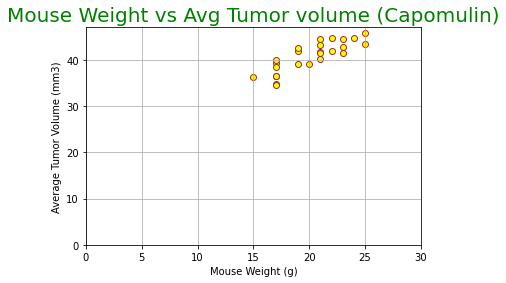

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
treatment="Capomulin"
scatter_mice_filter = (combined_study_df["Drug Regimen"] == treatment)
scatter_plot_df = combined_study_df.loc[scatter_mice_filter].set_index("Mouse ID")
mouse_weight_series = scatter_plot_df["Weight (g)"].groupby(by="Mouse ID").mean()
tumor_vol_series = scatter_plot_df["Tumor Volume (mm3)"].groupby(by="Mouse ID").mean()

# plt.style.use('seaborn')
plt.scatter(
    x = mouse_weight_series,
    y = tumor_vol_series,
    marker = "o",
    edgecolor = "brown",
    facecolor = "yellow"
)
plt.title(f"Mouse Weight vs Avg Tumor volume ({treatment})", fontsize=20, color="green")
plt.xlim(0, 30)
plt.xlabel("Mouse Weight (g)")
plt.ylim(0, y_max)
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
